In [1]:
import numpy as np
import xarray as xr
import VISSSlib
from PIL import Image, ImageDraw, ImageFont
import cv2
from VISSSlib.detection import *
import matplotlib.pyplot as plt
import seaborn
import scipy

from skimage.draw import polygon

# settings

In [2]:
from addict import Dict

config = Dict({'height_offset': 64,
 'minMovingPixels': [20, 10, 5, 2, 2, 2, 2],
 'threshs': [20, 30, 40, 60, 80, 100, 120],
 'goodFiles': ['None', 'None'],
 'level1detectQuicklook': {'minBlur': 1000,
  'minSize': 10,
  'omitLabel4small': True},
 'level1detect': {'maxMovingObjects': 60,
  'minAspectRatio': None,
  'minBlur': 500,
  'minSize': 8},
 'computers': ['visss01', 'visss01'],
 'cropImage': None,
 'fps': 140,
 'exposureTime': 0.0002,
 'resolution': 46.71,
 'frame_height': 464,
 'frame_width': 400,
 'instruments': ['leader_S1145792', 'follower_S1143155'],
 'instrumentsOrig': ['leader_S1242799', 'follower_S1242357'],
 'leader': 'leader_S1145792',
 'follower': 'follower_S1143155',
 'movieExtension': 'mkv',
 'nThreads': 1,
 'path': '/projekt1/ag_maahn/data_obs/sail/visss/{level}',
 'pathOut': '/projekt6/ag_maahn/pfeifer/masks/',
 'pathTmp': '/projekt6/ag_maahn/pfeifer/masks/temp/',
 'pathQuicklooks': '/projekt6/ag_maahn/pfeifer/masks/quicklooks/',
 'visssGen': 'visss',
 'site': 'sail',
 'start': '2022-11-05',
 'end': '2023-06-06',
 'name': 'TEST',
 'dataFixes': [],
 'newFileInt': 600,
 'model': 'M1280',
         })

In [3]:

shape_frame = (config.frame_height,config.frame_width,)
blurSigma=1.5
minBlur=10
minArea=1
minDmax=2
stopAfter=None

trainingSize=100
backSubKW={"dist2Threshold": 400,
           "detectShadows": False, "history": 100}
cropImage=config["cropImage"]
applyCanny2Frame=False
applyCanny2Particle=True
dilateIterations=1
blurSigma=1.5
minBlur=10
backSub=cv2.createBackgroundSubtractorKNN
erosionTestThreshold=0.06
minArea=1
minDmax=2
minAspectRatio=None

In [4]:
frequencies = np.arange(1, 17)

# Circle

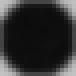

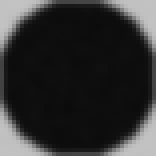

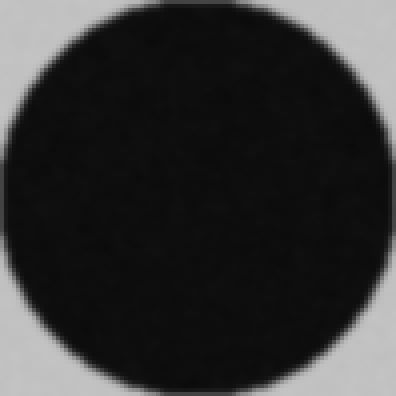

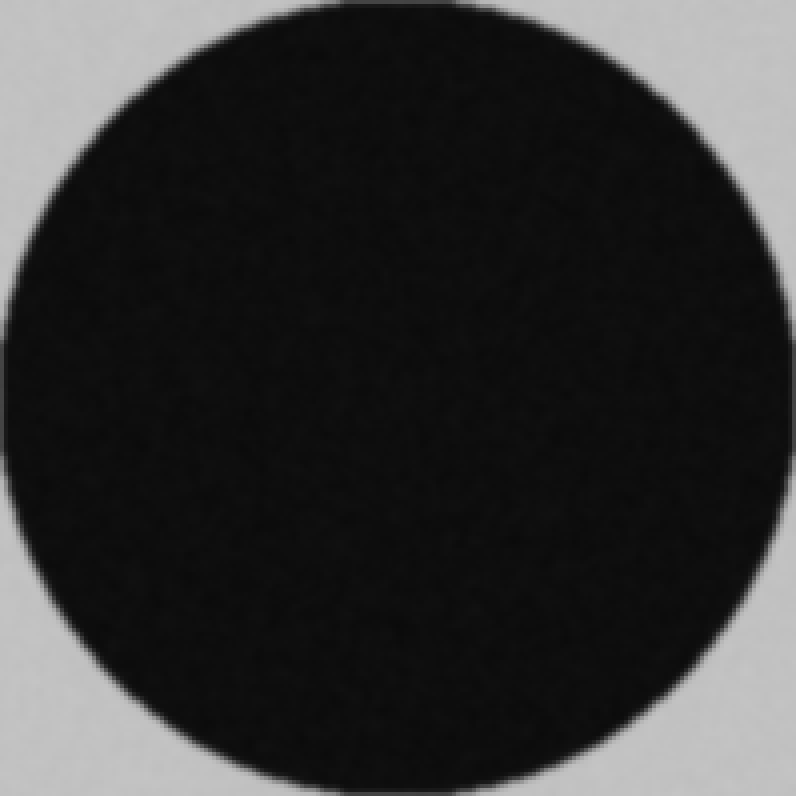

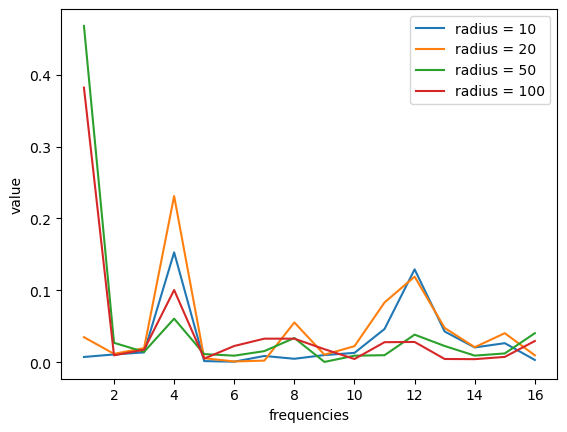

In [5]:
for radius in [10, 20, 50, 100]:
    snowParticles = detectedParticles(
        config,
        trainingSize=trainingSize,
        backSubKW=backSubKW,
        cropImage=cropImage,
        applyCanny2Particle=applyCanny2Particle,
        dilateIterations=dilateIterations,
        blurSigma=blurSigma,
        minBlur=minBlur,
        backSub=backSub,
        erosionTestThreshold=erosionTestThreshold,
        minArea=minArea,
        minDmax=minDmax,
        minAspectRatio=None,
    )
    
    for ff in range(20):
        snowParticles.update(np.random.randint(190,200, size=shape_frame, dtype=np.uint8),
                                       ff,
                                       -99,
                                       -99,
                                       -99,
                                       -99,
                                       -99,
                                       training=True)
    
    ff+=1
    
    particle = np.random.randint(190,200, size=shape_frame, dtype=np.uint8)
    img_object = np.random.randint(10,20, size=shape_frame, dtype=np.uint8)
    rr, cc = skimage.draw.disk(shape=shape_frame, center=(200, 200), radius=radius)
    mask = np.zeros(shape_frame)
    mask[rr, cc] = 1
    particle = np.where(mask, img_object, particle)
    particle = scipy.ndimage.gaussian_filter(particle, 1)
    Image.fromarray(particle)
    snowParticles.update(particle,
                                           ff,
                                           999,
                                           999,
                                           99999,
                                           99999,
                                           0
                                           )
    tools.displayImage(snowParticles.lastParticle.particleBox, rescale=4)
    seaborn.lineplot(x=frequencies, y=snowParticles.lastParticle.contourFFT/snowParticles.lastParticle.contourFFTsum, label = 'radius = {}'.format(radius))
    plt.xlabel('frequencies')
    plt.ylabel('value')

    #print(snowParticles.lastParticle.contourFFT)

# Stars

## 8 

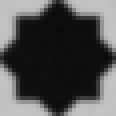

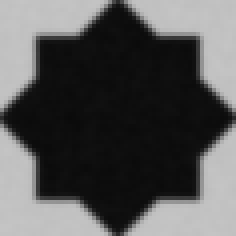

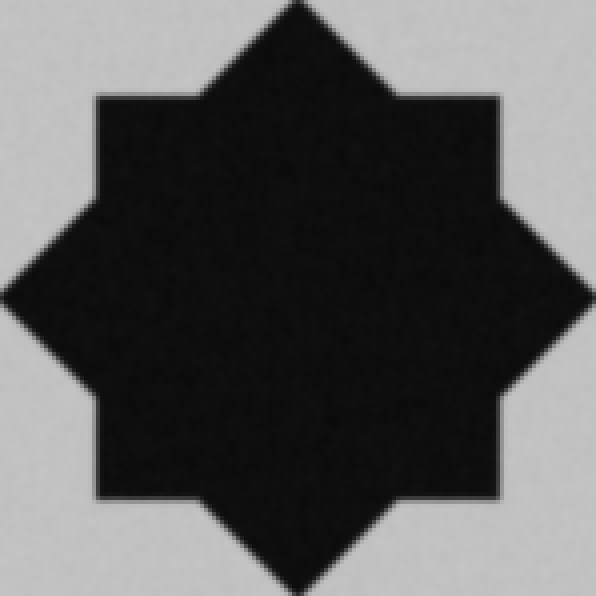

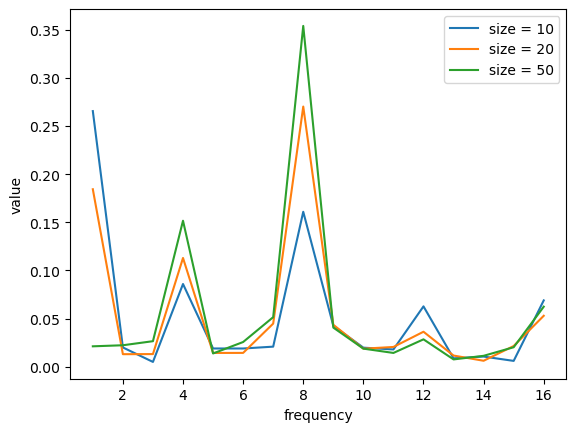

In [10]:
for size in [10, 20, 50]:
    snowParticles = detectedParticles(
            config,
            trainingSize=trainingSize,
            backSubKW=backSubKW,
            cropImage=cropImage,
            applyCanny2Particle=applyCanny2Particle,
            dilateIterations=dilateIterations,
            blurSigma=blurSigma,
            minBlur=minBlur,
            backSub=backSub,
            erosionTestThreshold=erosionTestThreshold,
            minArea=minArea,
            minDmax=minDmax,
            minAspectRatio=None,
        )
        
    for ff in range(20):
        snowParticles.update(np.random.randint(190,200, size=shape_frame, dtype=np.uint8),
                                           ff,
                                           -99,
                                           -99,
                                           -99,
                                           -99,
                                           -99,
                                           training=True)
        
        ff+=1
        
    particle = np.random.randint(190,200, size=shape_frame, dtype=np.uint8)
    img_object = np.random.randint(10,20, size=shape_frame, dtype=np.uint8)
    rr, cc = skimage.draw.disk(shape=shape_frame, center=(200, 200), radius=10)
    star = skimage.morphology.star(size)
    star_padded = np.pad(star, ((shape_frame[0] - star.shape[0] - 10, 10), (shape_frame[1] - star.shape[1] -10, 10)))
    particle = np.where(star_padded, img_object, particle)
    particle = scipy.ndimage.gaussian_filter(particle, 0.8)    
    Image.fromarray(particle)
    snowParticles.update(particle,
                                               ff,
                                               999,
                                               999,
                                               99999,
                                               99999,
                                               0
                                               )
    tools.displayImage(snowParticles.lastParticle.particleBox, rescale=4)
    seaborn.lineplot(x = frequencies, y=snowParticles.lastParticle.contourFFT/snowParticles.lastParticle.contourFFTsum, label = 'size = {}'.format(size))
    plt.xlabel('frequency')
    plt.ylabel('value')
plt.legend()

## 6

### size

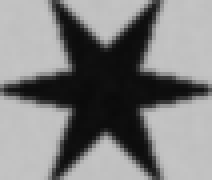

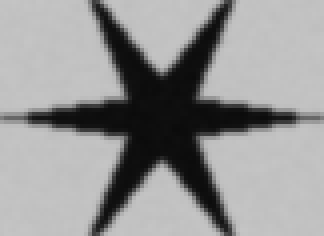

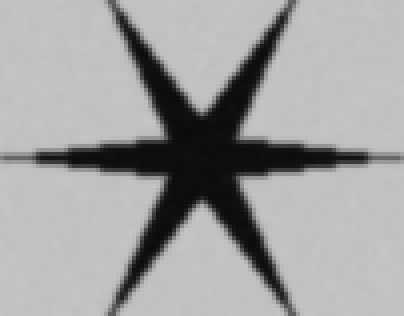

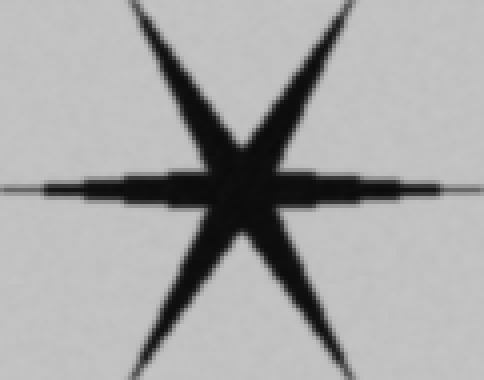

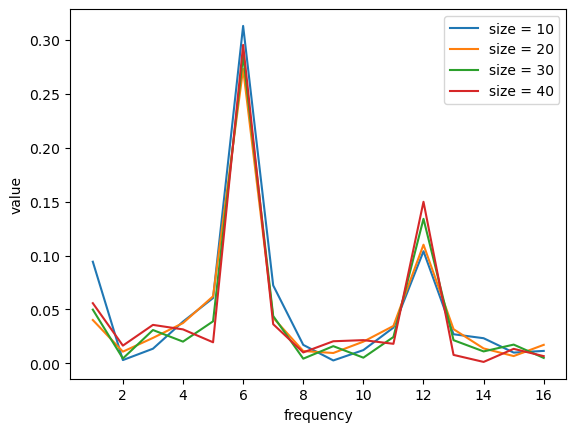

In [11]:

for N in [1, 2, 3, 4]:

    snowParticles = detectedParticles(
            config,
            trainingSize=trainingSize,
            backSubKW=backSubKW,
            cropImage=cropImage,
            applyCanny2Particle=applyCanny2Particle,
            dilateIterations=dilateIterations,
            blurSigma=blurSigma,
            minBlur=minBlur,
            backSub=backSub,
            erosionTestThreshold=erosionTestThreshold,
            minArea=minArea,
            minDmax=minDmax,
            minAspectRatio=None,
        )
        
    for ff in range(20):
        snowParticles.update(np.random.randint(190,200, size=shape_frame, dtype=np.uint8),
                                           ff,
                                           -99,
                                           -99,
                                           -99,
                                           -99,
                                           -99,
                                           training=True)
        
        ff+=1
    
    points = np.linspace(0, 2*np.pi, 13)
    factors = np.ones(13)*10
    factors[::2] = 10*(N+2)
    coords = np.array([factors*np.sin(points) + 200, factors*np.cos(points) + 200])
    coords = coords[:,0:-1]
    # Create an empty image to draw the star on
    image = np.zeros(shape_frame, dtype=np.uint8)
    
    # Define the vertices of the 6-ended star
    vertices = coords.T
    
    
    
    # Create the symmetric 6-ended star-shaped mask by drawing and filling the polygon
    rr, cc = polygon(*zip(*vertices))
    image[rr, cc] = 1
    
    particle = np.random.randint(190,200, size=shape_frame, dtype=np.uint8)
    img_object = np.random.randint(10,20, size=shape_frame, dtype=np.uint8)

    particle = np.where(image, img_object, particle)
    particle = scipy.ndimage.gaussian_filter(particle, 0.8)    
    Image.fromarray(particle)
    snowParticles.update(particle,
                                               ff,
                                               999,
                                               999,
                                               99999,
                                               99999,
                                               0
                                               )
    tools.displayImage(snowParticles.lastParticle.particleBox, rescale=4)
    seaborn.lineplot(x = frequencies, y = snowParticles.lastParticle.contourFFT/snowParticles.lastParticle.contourFFTsum, label = 'size = {}0'.format(N))
    plt.xlabel('frequency')
    plt.ylabel('value')
plt.show()

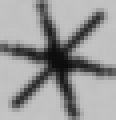

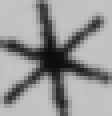

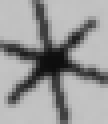

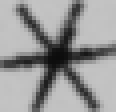

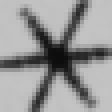

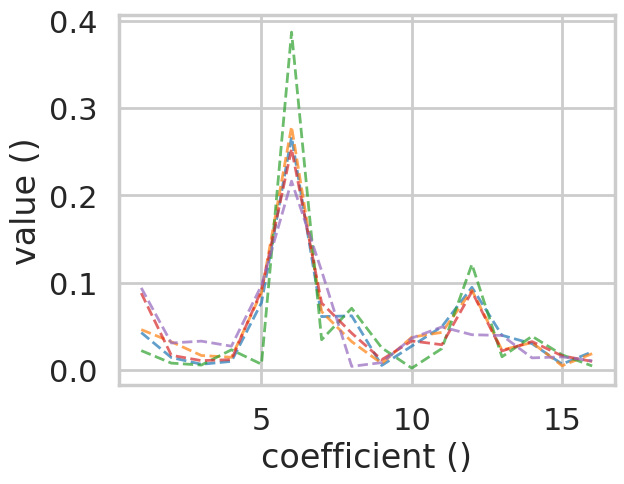

In [25]:
seaborn.set_style('whitegrid')
seaborn.set_context('poster')

boxes = []

for N in np.ones(5):

    snowParticles = detectedParticles(
            config,
            trainingSize=trainingSize,
            backSubKW=backSubKW,
            cropImage=cropImage,
            applyCanny2Particle=applyCanny2Particle,
            dilateIterations=dilateIterations,
            blurSigma=blurSigma,
            minBlur=minBlur,
            backSub=backSub,
            erosionTestThreshold=erosionTestThreshold,
            minArea=minArea,
            minDmax=minDmax,
            minAspectRatio=None,
        )
        
    for ff in range(20):
        snowParticles.update(np.random.randint(190,200, size=shape_frame, dtype=np.uint8),
                                           ff,
                                           -99,
                                           -99,
                                           -99,
                                           -99,
                                           -99,
                                           training=True)
        
        ff+=1
    
    points = np.linspace(0, 2*np.pi, 13)
    factors = np.ones(13)*2*N
    factors[::2] = 5*(N+2)
    coords = np.array([factors*np.sin(points) + 200, factors*np.cos(points) + 200])
    coords = coords[:,0:-1]
    # Create an empty image to draw the star on
    image = np.zeros(shape_frame, dtype=np.uint8)
    
    # Define the vertices of the 6-ended star
    vertices = coords.T
    
    
    
    # Create the symmetric 6-ended star-shaped mask by drawing and filling the polygon
    rr, cc = polygon(*zip(*vertices))
    image[rr, cc] = 1
    rotation = np.random.random()*360
    image = skimage.transform.rotate(image, rotation)
    particle = np.random.randint(190,200, size=shape_frame, dtype=np.uint8)
    img_object = np.random.randint(10,20, size=shape_frame, dtype=np.uint8)

    particle = np.where(image, img_object, particle)
    particle = scipy.ndimage.gaussian_filter(particle, 0.8)
    
    Image.fromarray(particle)
    snowParticles.update(particle,
                                               ff,
                                               999,
                                               999,
                                               99999,
                                               99999,
                                               0
                                               )
    tools.displayImage(snowParticles.lastParticle.particleBox, rescale=4)
    seaborn.lineplot(x = np.arange(1, 17, 1), 
                     y=snowParticles.lastParticle.contourFFT/snowParticles.lastParticle.contourFFTsum,
                    alpha = 0.7,
                     linewidth = 2,
                    linestyle = '--')
    plt.xlabel('coefficient ()')
    plt.ylabel('value ()')
    boxes.append(snowParticles.lastParticle.particleBox)

plt.savefig('fft_output_star.png', bbox_inches="tight")
#plt.legend()

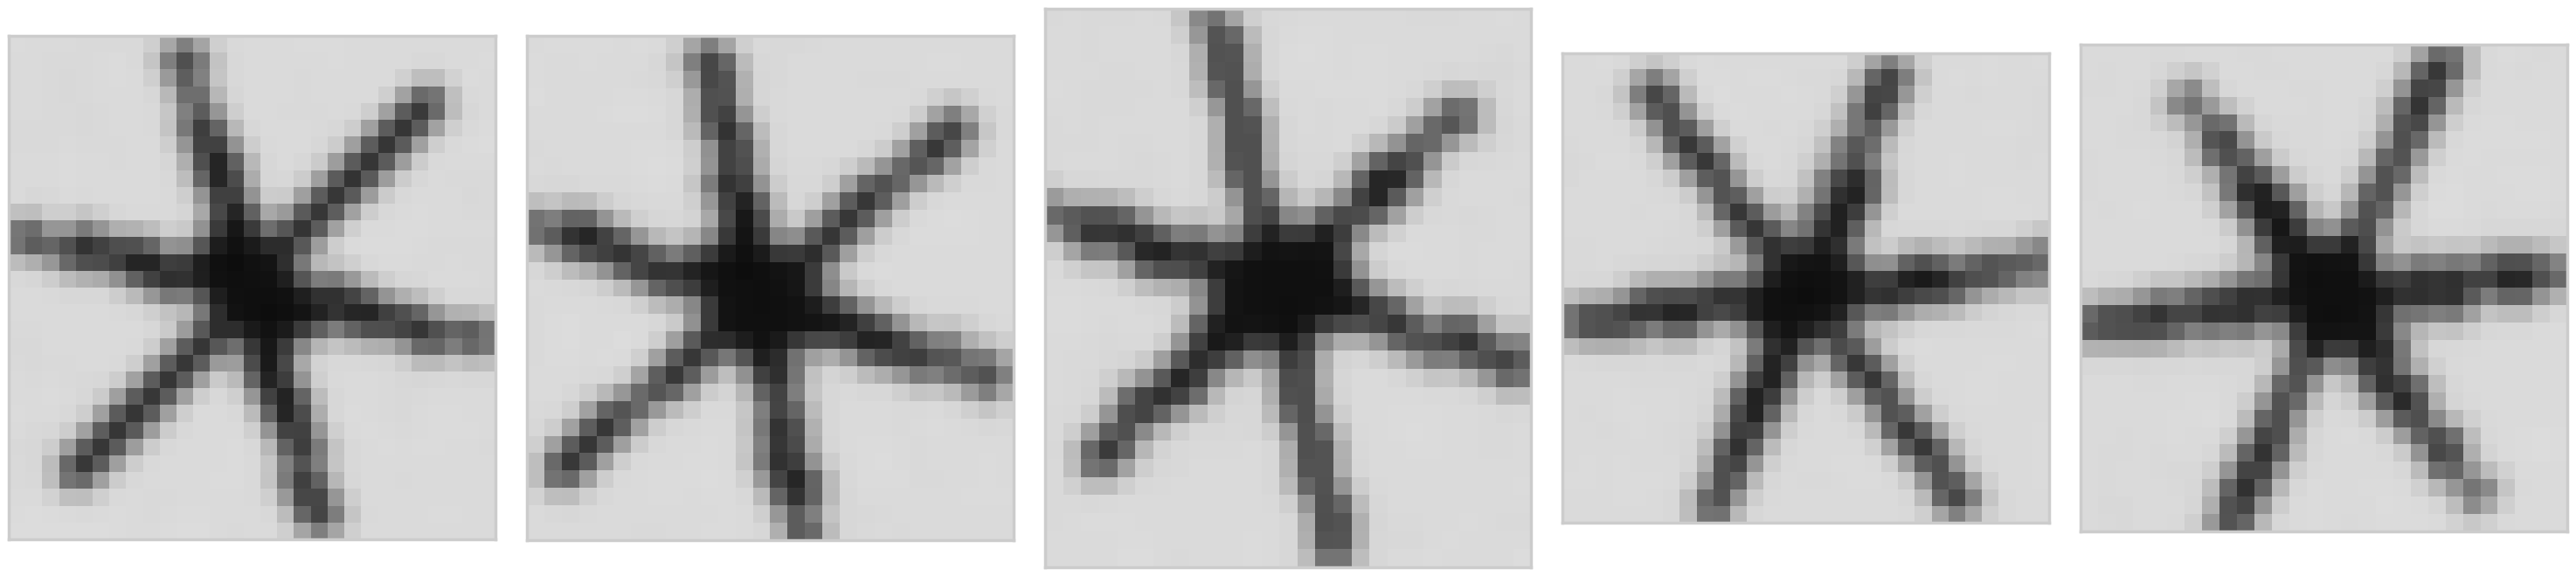

In [26]:
fig, ax = plt.subplots(ncols=len(boxes), figsize = (30,8))

for axes, box in zip(ax, boxes):
    axes.imshow(box, vmin=0, vmax=255, cmap = 'Greys_r')
    axes.grid(visible=False)
    axes.set_yticks([])
    axes.set_xticks([])

    #axes.set_aspect('equal')
plt.tight_layout()
plt.savefig('fft_input_star.png')
#plt.tight_layout()

### tilt

In [315]:
np.random.random(10)

array([0.54583178, 0.63395619, 0.65555197, 0.95393951, 0.93530492,
       0.6603018 , 0.17605548, 0.33146138, 0.73668668, 0.90673504])

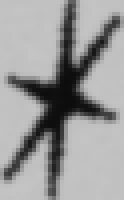

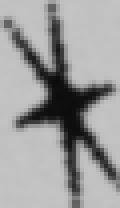

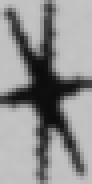

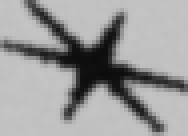

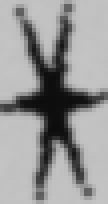

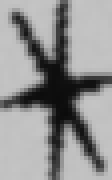

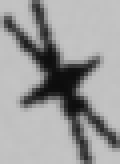

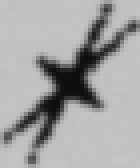

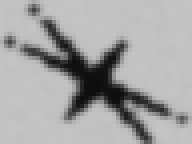

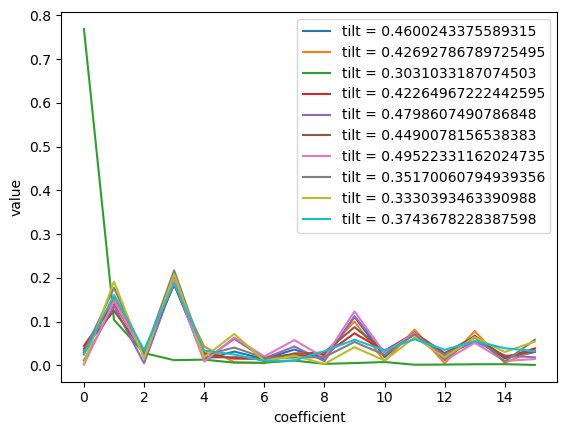

In [13]:
import skimage.transform

for N in np.ones(10):

    snowParticles = detectedParticles(
            config,
            trainingSize=trainingSize,
            backSubKW=backSubKW,
            cropImage=cropImage,
            applyCanny2Particle=applyCanny2Particle,
            dilateIterations=dilateIterations,
            blurSigma=blurSigma,
            minBlur=minBlur,
            backSub=backSub,
            erosionTestThreshold=erosionTestThreshold,
            minArea=minArea,
            minDmax=minDmax,
            minAspectRatio=None,
        )
        
    for ff in range(20):
        snowParticles.update(np.random.randint(190,200, size=shape_frame, dtype=np.uint8),
                                           ff,
                                           -99,
                                           -99,
                                           -99,
                                           -99,
                                           -99,
                                           training=True)
        
        ff+=1
    
    points = np.linspace(0, 2*np.pi, 13)
    factors = np.ones(13)*5*N
    factors[::2] = 10*(N+2)
    scaling = 0.3+np.random.random()*0.2
    coords = np.array([factors*np.sin(points) + 200, scaling*factors*np.cos(points) + 200])
    coords = coords[:,0:-1]
    
    # Create an empty image to draw the star on
    image = np.zeros(shape_frame, dtype=np.uint8)
    
    # Define the vertices of the 6-ended star
    vertices = coords.T
    
    
    
    # Create the symmetric 6-ended star-shaped mask by drawing and filling the polygon
    rr, cc = polygon(*zip(*vertices))
    image[rr, cc] = 1
    rotation = np.random.random()*360
    image = skimage.transform.rotate(image, rotation)
    
    particle = np.random.randint(190,200, size=shape_frame, dtype=np.uint8)
    img_object = np.random.randint(10,20, size=shape_frame, dtype=np.uint8)

    particle = np.where(image, img_object, particle)
    particle = scipy.ndimage.gaussian_filter(particle, 0.8)
    #particle = skimage.transform.rescale(particle, (0.5, 2))    
    Image.fromarray(particle)
    snowParticles.update(particle,
                                               ff,
                                               999,
                                               999,
                                               99999,
                                               99999,
                                               0
                                               )
    tools.displayImage(snowParticles.lastParticle.particleBox, rescale=4)
    seaborn.lineplot(snowParticles.lastParticle.contourFFT/snowParticles.lastParticle.contourFFTsum, label = 'tilt = {}'.format(scaling))
    plt.xlabel('coefficient')
    plt.ylabel('value')
plt.legend()

# Plates

### size

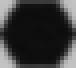

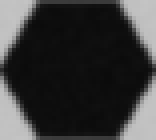

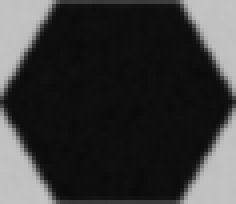

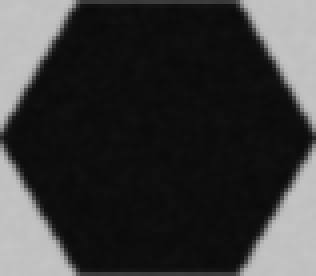

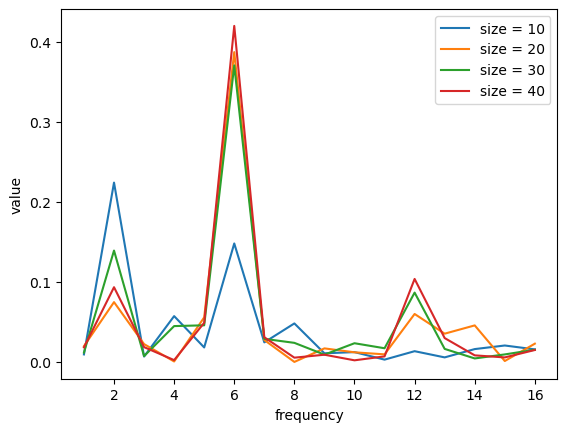

In [14]:

for N in [1, 2, 3, 4]:

    snowParticles = detectedParticles(
            config,
            trainingSize=trainingSize,
            backSubKW=backSubKW,
            cropImage=cropImage,
            applyCanny2Particle=applyCanny2Particle,
            dilateIterations=dilateIterations,
            blurSigma=blurSigma,
            minBlur=minBlur,
            backSub=backSub,
            erosionTestThreshold=erosionTestThreshold,
            minArea=minArea,
            minDmax=minDmax,
            minAspectRatio=None,
        )
        
    for ff in range(20):
        snowParticles.update(np.random.randint(190,200, size=shape_frame, dtype=np.uint8),
                                           ff,
                                           -99,
                                           -99,
                                           -99,
                                           -99,
                                           -99,
                                           training=True)
        
        ff+=1
    
    points = np.linspace(0, 2*np.pi, 7)
    factors = np.ones(7)*10*N
    coords = np.array([factors*np.sin(points) + 200, factors*np.cos(points) + 200])
    coords = coords[:,0:-1]
    # Create an empty image to draw the star on
    image = np.zeros(shape_frame, dtype=np.uint8)
    
    # Define the vertices of the 6-ended star
    vertices = coords.T
    
    
    
    # Create the symmetric 6-ended star-shaped mask by drawing and filling the polygon
    rr, cc = polygon(*zip(*vertices))
    image[rr, cc] = 1
    
    particle = np.random.randint(190,200, size=shape_frame, dtype=np.uint8)
    img_object = np.random.randint(10,20, size=shape_frame, dtype=np.uint8)

    particle = np.where(image, img_object, particle)
    particle = scipy.ndimage.gaussian_filter(particle, 0.8)
    
    Image.fromarray(particle)
    snowParticles.update(particle,
                                               ff,
                                               999,
                                               999,
                                               99999,
                                               99999,
                                               0
                                               )
    tools.displayImage(snowParticles.lastParticle.particleBox, rescale=4)
    seaborn.lineplot(x = frequencies, y = snowParticles.lastParticle.contourFFT/snowParticles.lastParticle.contourFFTsum, label = 'size = {}0'.format(N))
    plt.xlabel('frequency')
    plt.ylabel('value')
    #plt.show()

### rotation

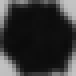

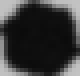

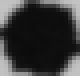

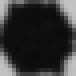

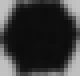

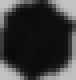

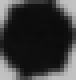

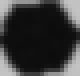

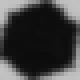

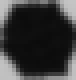

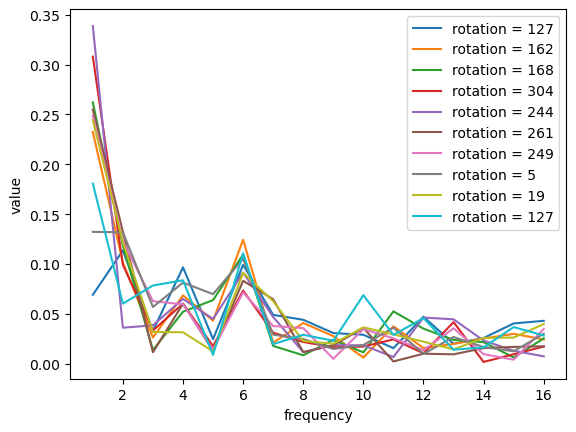

In [25]:

for N in np.ones(10)*2:

    snowParticles = detectedParticles(
            config,
            trainingSize=trainingSize,
            backSubKW=backSubKW,
            cropImage=cropImage,
            applyCanny2Particle=applyCanny2Particle,
            dilateIterations=dilateIterations,
            blurSigma=blurSigma,
            minBlur=minBlur,
            backSub=backSub,
            erosionTestThreshold=erosionTestThreshold,
            minArea=minArea,
            minDmax=minDmax,
            minAspectRatio=None,
        )
        
    for ff in range(20):
        snowParticles.update(np.random.randint(190,200, size=shape_frame, dtype=np.uint8),
                                           ff,
                                           -99,
                                           -99,
                                           -99,
                                           -99,
                                           -99,
                                           training=True)
        
        ff+=1
    
    points = np.linspace(0, 2*np.pi, 7)
    factors = np.ones(7)*5*N
    coords = np.array([factors*np.sin(points) + 200, factors*np.cos(points) + 200])
    coords = coords[:,0:-1]
    # Create an empty image to draw the star on
    image = np.zeros(shape_frame, dtype=np.uint8)
    
    # Define the vertices of the 6-ended star
    vertices = coords.T
    
    
    
    # Create the symmetric 6-ended star-shaped mask by drawing and filling the polygon
    rr, cc = polygon(*zip(*vertices))
    image[rr, cc] = 1
    rotation = np.random.random()*360
    image = skimage.transform.rotate(image, rotation)
    particle = np.random.randint(190,200, size=shape_frame, dtype=np.uint8)
    img_object = np.random.randint(10,20, size=shape_frame, dtype=np.uint8)

    particle = np.where(image, img_object, particle)
    particle = scipy.ndimage.gaussian_filter(particle, 0.8)
    
    Image.fromarray(particle)
    snowParticles.update(particle,
                                               ff,
                                               999,
                                               999,
                                               99999,
                                               99999,
                                               0
                                               )
    tools.displayImage(snowParticles.lastParticle.particleBox, rescale=4)
    seaborn.lineplot(x = frequencies, y = snowParticles.lastParticle.contourFFT/snowParticles.lastParticle.contourFFTsum, label = 'rotation = {}'.format(int(rotation)))
    plt.xlabel('frequency')
    plt.ylabel('value')
    #plt.show()

### tilt

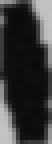

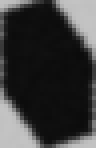

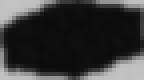

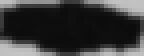

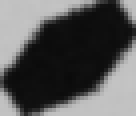

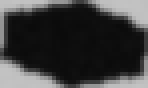

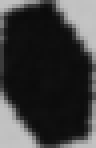

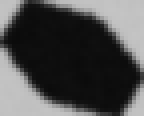

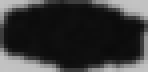

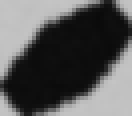

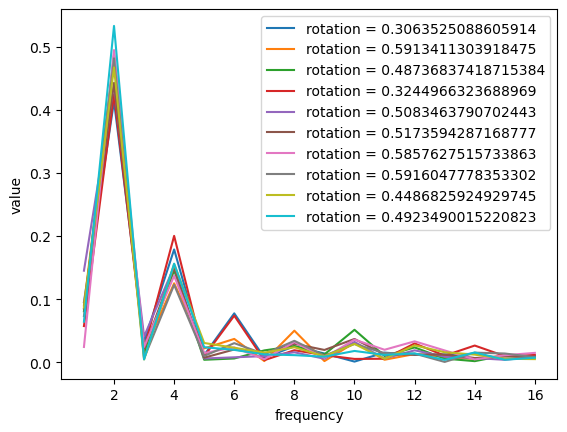

In [24]:

for N in np.ones(10)*2:

    snowParticles = detectedParticles(
            config,
            trainingSize=trainingSize,
            backSubKW=backSubKW,
            cropImage=cropImage,
            applyCanny2Particle=applyCanny2Particle,
            dilateIterations=dilateIterations,
            blurSigma=blurSigma,
            minBlur=minBlur,
            backSub=backSub,
            erosionTestThreshold=erosionTestThreshold,
            minArea=minArea,
            minDmax=minDmax,
            minAspectRatio=None,
        )
        
    for ff in range(20):
        snowParticles.update(np.random.randint(190,200, size=shape_frame, dtype=np.uint8),
                                           ff,
                                           -99,
                                           -99,
                                           -99,
                                           -99,
                                           -99,
                                           training=True)
        
        ff+=1
    
    points = np.linspace(0, 2*np.pi, 7)
    factors = np.ones(7)*10*N
    scaling = 0.3+np.random.random()*0.3
    coords = np.array([factors*np.sin(points) + 200, scaling*factors*np.cos(points) + 200])
    coords = coords[:,0:-1]
    # Create an empty image to draw the star on
    image = np.zeros(shape_frame, dtype=np.uint8)
    
    # Define the vertices of the 6-ended star
    vertices = coords.T
    
    
    
    # Create the symmetric 6-ended star-shaped mask by drawing and filling the polygon
    rr, cc = polygon(*zip(*vertices))
    image[rr, cc] = 1
    rotation = np.random.random()*360
    image = skimage.transform.rotate(image, rotation)
    particle = np.random.randint(190,200, size=shape_frame, dtype=np.uint8)
    img_object = np.random.randint(10,20, size=shape_frame, dtype=np.uint8)

    particle = np.where(image, img_object, particle)
    particle = scipy.ndimage.gaussian_filter(particle, 0.8)
    
    Image.fromarray(particle)
    snowParticles.update(particle,
                                               ff,
                                               999,
                                               999,
                                               99999,
                                               99999,
                                               0
                                               )
    tools.displayImage(snowParticles.lastParticle.particleBox, rescale=4)
    seaborn.lineplot(x = frequencies, y = snowParticles.lastParticle.contourFFT/snowParticles.lastParticle.contourFFTsum, label = 'rotation = {}'.format(scaling))
    plt.xlabel('frequency')
    plt.ylabel('value')
    #plt.show()

# needles

## rotation

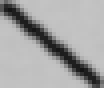

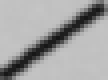

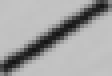

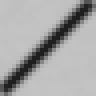

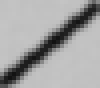

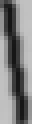

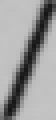

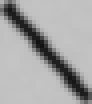

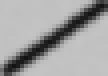

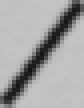

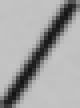

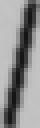

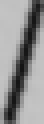

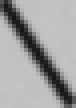

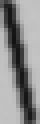

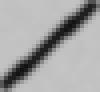

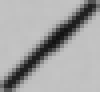

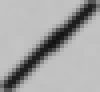

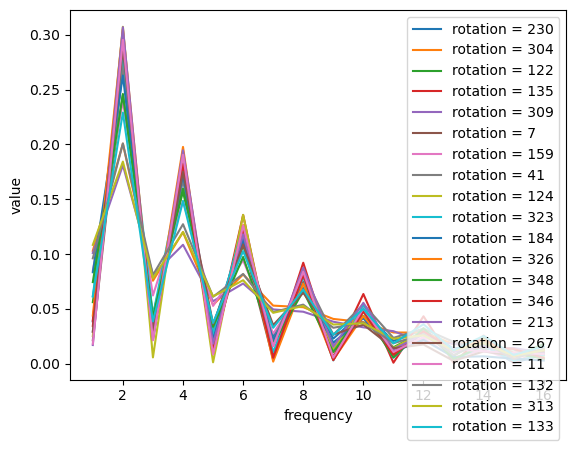

In [23]:
length = 30
width = 1

for N in np.ones(20)*2:

    snowParticles = detectedParticles(
            config,
            trainingSize=trainingSize,
            backSubKW=backSubKW,
            cropImage=cropImage,
            applyCanny2Particle=applyCanny2Particle,
            dilateIterations=dilateIterations,
            blurSigma=blurSigma,
            minBlur=minBlur,
            backSub=backSub,
            erosionTestThreshold=erosionTestThreshold,
            minArea=minArea,
            minDmax=minDmax,
            minAspectRatio=None,
        )
        
    for ff in range(20):
        snowParticles.update(np.random.randint(190,200, size=shape_frame, dtype=np.uint8),
                                           ff,
                                           -99,
                                           -99,
                                           -99,
                                           -99,
                                           -99,
                                           training=True)
        
        ff+=1
    
    image = np.zeros(shape_frame, dtype=np.uint8)

    vertices = np.array([[200, 200], [200 + length, 200], [200 + length, 200 + width], [200, 200 + width]])
    
    rr, cc = polygon(*zip(*vertices))
    image[rr, cc] = 1
    rotation = np.random.random()*360
    image = skimage.transform.rotate(image, rotation)
    particle = np.random.randint(190,200, size=shape_frame, dtype=np.uint8)
    img_object = np.random.randint(10,20, size=shape_frame, dtype=np.uint8)

    particle = np.where(image, img_object, particle)
    particle = scipy.ndimage.gaussian_filter(particle, 0.8)
    
    Image.fromarray(particle)
    snowParticles.update(particle,
                                               ff,
                                               999,
                                               999,
                                               99999,
                                               99999,
                                               0
                                               )
    tools.displayImage(snowParticles.lastParticle.particleBox, rescale=4)
    seaborn.lineplot(x=frequencies, y=snowParticles.lastParticle.contourFFT/snowParticles.lastParticle.contourFFTsum, label = 'rotation = {}'.format(int(rotation)))
    plt.xlabel('frequency')
    plt.ylabel('value')
    #plt.show()

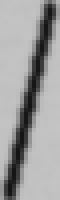

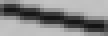

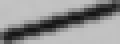

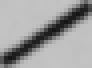

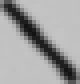

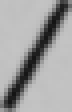

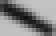

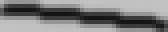

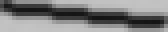

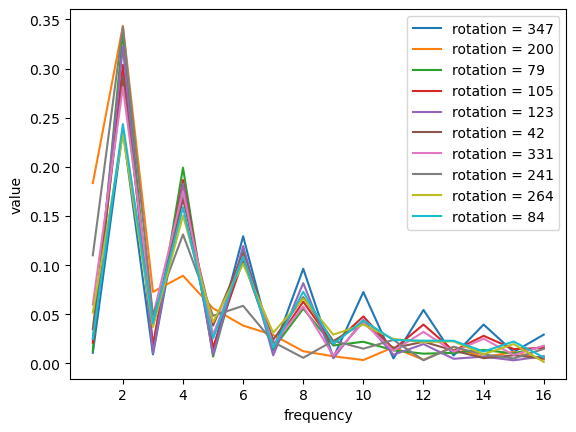

In [22]:
width = 1

for length in np.random.randint(10, 50, size = 10):

    snowParticles = detectedParticles(
            config,
            trainingSize=trainingSize,
            backSubKW=backSubKW,
            cropImage=cropImage,
            applyCanny2Particle=applyCanny2Particle,
            dilateIterations=dilateIterations,
            blurSigma=blurSigma,
            minBlur=minBlur,
            backSub=backSub,
            erosionTestThreshold=erosionTestThreshold,
            minArea=minArea,
            minDmax=minDmax,
            minAspectRatio=None,
        )
        
    for ff in range(20):
        snowParticles.update(np.random.randint(190,200, size=shape_frame, dtype=np.uint8),
                                           ff,
                                           -99,
                                           -99,
                                           -99,
                                           -99,
                                           -99,
                                           training=True)
        
        ff+=1
    
    image = np.zeros(shape_frame, dtype=np.uint8)

    vertices = np.array([[200, 200], [200 + length, 200], [200 + length, 200 + width], [200, 200 + width]])
    
    rr, cc = polygon(*zip(*vertices))
    image[rr, cc] = 1
    rotation = np.random.random()*360
    image = skimage.transform.rotate(image, rotation)
    particle = np.random.randint(190,200, size=shape_frame, dtype=np.uint8)
    img_object = np.random.randint(10,20, size=shape_frame, dtype=np.uint8)

    particle = np.where(image, img_object, particle)
    particle = scipy.ndimage.gaussian_filter(particle, 0.8)
    
    Image.fromarray(particle)
    snowParticles.update(particle,
                                               ff,
                                               999,
                                               999,
                                               99999,
                                               99999,
                                               0
                                               )
    tools.displayImage(snowParticles.lastParticle.particleBox, rescale=4)
    seaborn.lineplot(x = frequencies, y=snowParticles.lastParticle.contourFFT/snowParticles.lastParticle.contourFFTsum, label = 'rotation = {}'.format(int(rotation)))
    plt.xlabel('frequency')
    plt.ylabel('value')
    #plt.show()

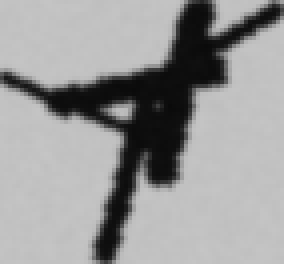

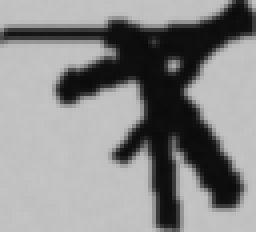

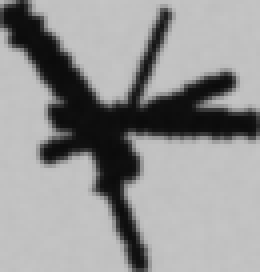

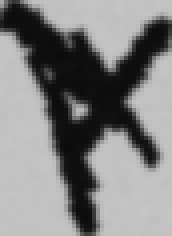

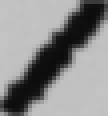

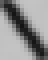

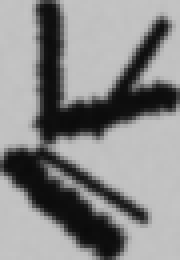

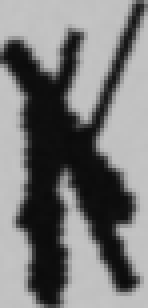

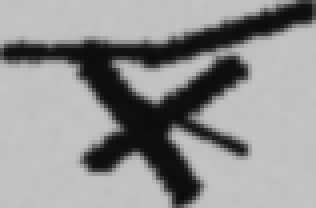

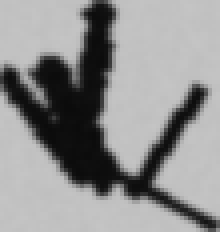

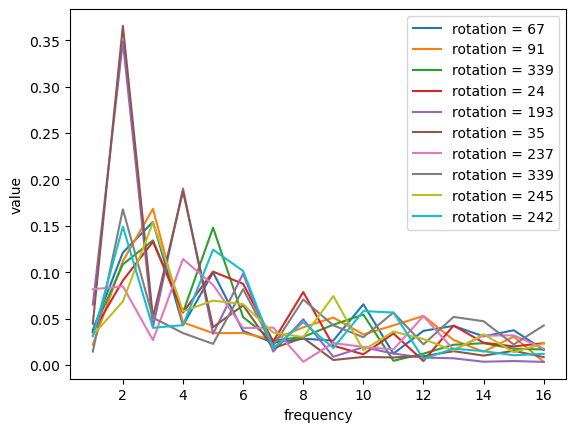

In [21]:
width = 1

for length in np.random.randint(10, 50, size = 10):

    snowParticles = detectedParticles(
            config,
            trainingSize=trainingSize,
            backSubKW=backSubKW,
            cropImage=cropImage,
            applyCanny2Particle=applyCanny2Particle,
            dilateIterations=dilateIterations,
            blurSigma=blurSigma,
            minBlur=minBlur,
            backSub=backSub,
            erosionTestThreshold=erosionTestThreshold,
            minArea=minArea,
            minDmax=minDmax,
            minAspectRatio=None,
        )
        
    for ff in range(20):
        snowParticles.update(np.random.randint(190,200, size=shape_frame, dtype=np.uint8),
                                           ff,
                                           -99,
                                           -99,
                                           -99,
                                           -99,
                                           -99,
                                           training=True)
        
        ff+=1
    
    image = np.zeros(shape_frame, dtype=np.uint8)
    for i in range(5):
        translation = np.random.randint(-10, 10, size = 2)
        vertices = np.array([[200 + translation[0], 200+ translation[1]], 
                             [200 + translation[0] + length, 200+ translation[1]], 
                             [200 + translation[0] + length, 200+ translation[1] + width], 
                             [200+ translation[0], 200+ translation[1] + width]])
        
        rr, cc = polygon(*zip(*vertices))
        image[rr, cc] = 1
        rotation = np.random.random()*360
        
        image = skimage.transform.rotate(image, rotation)

        particle = np.random.randint(190,200, size=shape_frame, dtype=np.uint8)
        img_object = np.random.randint(10,20, size=shape_frame, dtype=np.uint8)

    particle = np.where(image, img_object, particle)
    particle = scipy.ndimage.gaussian_filter(particle, 0.8)
    
    Image.fromarray(particle)
    snowParticles.update(particle,
                                               ff,
                                               999,
                                               999,
                                               99999,
                                               99999,
                                               0
                                               )
    tools.displayImage(snowParticles.lastParticle.particleBox, rescale=4)
    seaborn.lineplot(x = frequencies, y=snowParticles.lastParticle.contourFFT/snowParticles.lastParticle.contourFFTsum, label = 'rotation = {}'.format(int(rotation)))
    plt.xlabel('frequency')
    plt.ylabel('value')
    #plt.show()